## Load data

In [50]:
# Import the dataset loading function from sklearn
from sklearn.datasets import load_boston

# Load the Boston housing dataset
boston_dataset = load_boston()

# Display the oringal data
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [51]:
# Import pandas package to format the data
import pandas as pd

# Extract features with their names into the a dataframe format
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Extract target with their names into a pd.Series object with name MEDV
target = pd.Series(boston_dataset.target, name = 'MEDV')

# Visualize the first 5 samples of the data
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [52]:
# An alternative way to directly extract the data and target into numpy array format with no feature names
X, y = load_boston(return_X_y=True)

# look at the data
print("\n--Shape of the data feature matrix--\n {}".format(X.shape))
print("\n--Shape of the target vector--\n {}".format(y.shape))


--Shape of the data feature matrix--
 (506, 13)

--Shape of the target vector--
 (506,)


### Split the dataset into training and test set

In [53]:
# Split data into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Check the shape of whole dataset and the splited training and test set
print("--Shape of the whole data--\n {}".format(data.shape))
print("\n--Shape of the target vector--\n {}".format(target.shape))
print("\n--Shape of the training data--\n {}".format(X_train.shape))
print("\n--Shape of the testing data--\n {}".format(X_test.shape))

--Shape of the whole data--
 (506, 13)

--Shape of the target vector--
 (506,)

--Shape of the training data--
 (404, 13)

--Shape of the testing data--
 (102, 13)


## Exploratory data analysis  &  data preprocessing

### Q1: What are the data type of the values in each feature?

In [54]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [55]:
# Check for feature value type
print("-- Feature type --\n{}".format(data.dtypes))
print("\n-- Target type --\n{}".format(target.dtypes))

-- Feature type --
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

-- Target type --
float64


### Q2: How many distinct values each feature has in the dataset?

In [56]:
# Check for unique feature values
print("\n-- # of unique feature values --\n{}".format(data.nunique()))


-- # of unique feature values --
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64


### Q3: What are the scale and basic statistics of each feature?

In [57]:
# Viewing the data statistics
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


### Q4: Are there missing values contained in the data?

In [58]:
# Copy data to avoid inplace
train_data = X_train.copy()

# Add a column "MEDV" for the target house price
train_data['MEDV'] = y_train

# Check if there're missing values
print("\n-- # of missing values in training data --\n{}".format(train_data.isnull().sum()))
print("\n-- # of missing values in test data --\n{}".format(X_test.isnull().sum()))


-- # of missing values in training data --
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

-- # of missing values in test data --
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


##   Feature engineering: feature selection

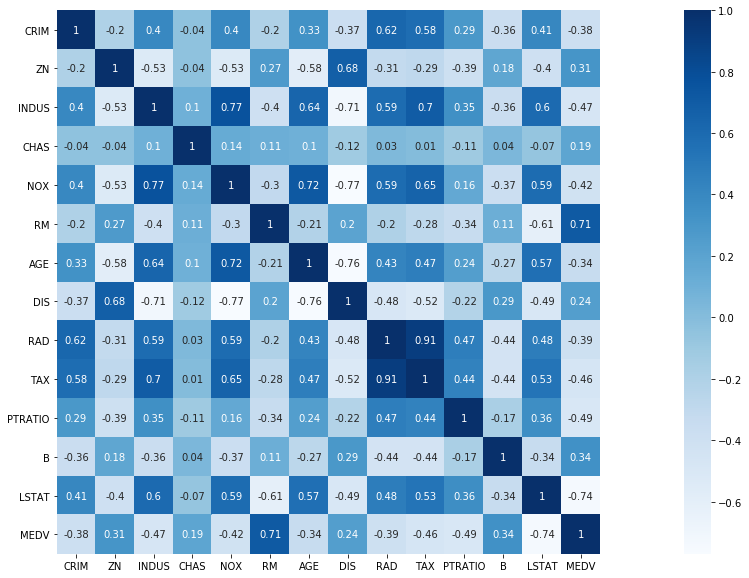

In [59]:
# Can we gain some insights by visualizing the distribution of them or correlationship between them?
# Import libraries for plotting
import matplotlib.pyplot as plt 
import seaborn as sns 


# Pretty display for notebooks (only in a Jupyter notebook)
%matplotlib inline


# Plot the correlation across all the features and the target
correlation_matrix = train_data.corr().round(2)
plt.figure(figsize=(30,10))
sns.heatmap(data=correlation_matrix, square= True, annot=True, cmap='Blues') #  fmt='.1f', annot_kws={'size':15}, 

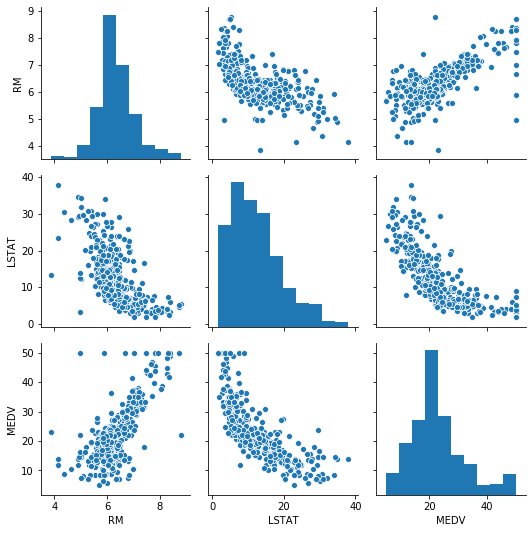

In [60]:
# Select high correlation features & display the pairplot

selected_feature_set = ['RM', 'LSTAT',]  # 'PTRATIO'
sub_train_data = train_data[ selected_feature_set + ['MEDV']] 

# Extract the new training features
X_train = sub_train_data.drop(['MEDV'], axis = 1)

# Select same feature sets for test data
X_test = X_test[selected_feature_set]


sns.pairplot(sub_train_data, height=2.5)
plt.tight_layout()


## Build up a linear regressor & a decision tree regressor

### Linear regression

In [61]:
# Import library for linear regression
from sklearn.linear_model import LinearRegression

# Training
# Create a Linear regressor
linear_regressor = LinearRegression()

# Train the model using the training sets 
linear_regressor.fit(X_train, y_train)

# Display the learned parameters
# Convert the coefficient values to a dataframe
coeffcients = pd.DataFrame(linear_regressor.coef_, X_train.columns, columns=['Coefficient'])  

# Display the intercept value
print("Learned intercept: {:.2f}".format(linear_regressor.intercept_))

print("\n--The learned coefficient value learned by the linear regression model--")
print(coeffcients)



Learned intercept: -3.84

--The learned coefficient value learned by the linear regression model--
       Coefficient
RM            5.47
LSTAT        -0.63


In [62]:
# Model prediction on training data
y_pred_train = linear_regressor.predict(X_train)
print('\n--Train MSE--\n{}'.format(mean_squared_error(y_train, y_pred_train)))



# Testing
from sklearn.metrics import mean_squared_error # mean_absolute_error

y_pred_test = linear_regressor.predict(X_test)

print('Test MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))


--Train MSE--
30.39185519321462
Test MSE: 31.24


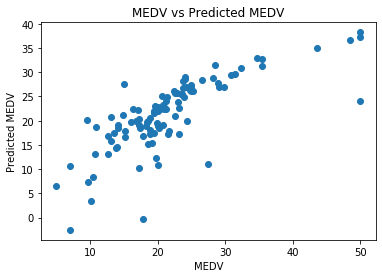

In [63]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel("MEDV")
plt.ylabel("Predicted MEDV")
plt.title("MEDV vs Predicted MEDV")
plt.show()

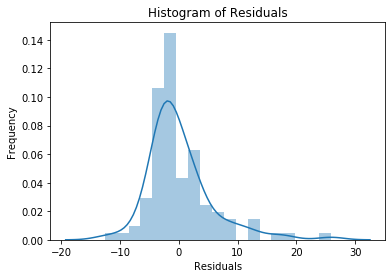

In [64]:
# Checking Normality of errors
sns.distplot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Decision tree

In [65]:
# Import library for decision tree
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [66]:
# Model prediction on training & test data
y_pred_train = tree_regressor.predict(X_train)
y_pred_test = tree_regressor.predict(X_test)

print('Train MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))

print('Test MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))

Train MSE: 17.52
Test MSE: 24.35


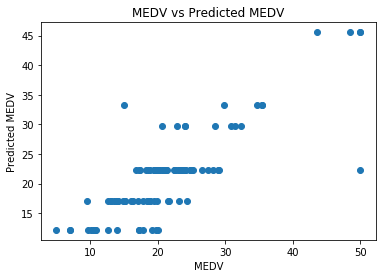

In [67]:
# Plot outputs
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel("MEDV")
plt.ylabel("Predicted MEDV")
plt.title("MEDV vs Predicted MEDV")
plt.show()

/home/qq/.virtualenvs/book/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


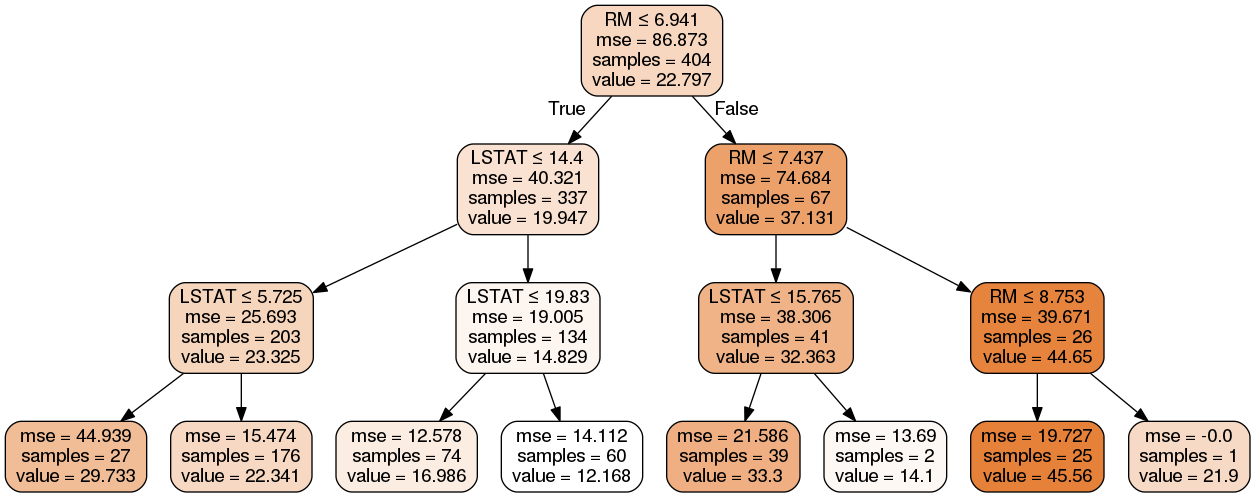

In [68]:
# Visualizing the decision tree
from sklearn.externals.six import StringIO 
import sklearn.tree as tree
import pydotplus

from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(tree_regressor, 
                     out_file=dot_data, 
                     class_names=['MEDV'], # the target names.
                     feature_names=selected_feature_set, # the feature names.
                     filled=True, # Whether to fill in the boxes with colours.
                     rounded=True, # Whether to round the corners of the boxes.
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Fine-Tuning: tune the tree depth hyperparameter in the tree regressor

In [69]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)  # sample indices of datasets for 5-fold cv

cv_sets = []
for train_index, test_index in kf.split(X_train):
    cv_sets.append((X_train.iloc[train_index],    
                    y_train.iloc[train_index], 
                    X_train.iloc[test_index],
                    y_train.iloc[test_index])) # construct 5-fold cv datasets

In [70]:
max_depths = list(range(1, 11))  # candidate max_depth hyperparamters

for max_depth in max_depths:
    cv_results = []
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)    
    for x_tr, y_tr, x_te, y_te in cv_sets: # loop through all the cv sets and average the validation results
        regressor.fit(x_tr, y_tr)
        cv_results.append(mean_squared_error(regressor.predict(x_te) , y_te))
    print('Tree depth: {}, Avg. MSE: {}'.format(max_depth, np.mean(cv_results))) 

Tree depth: 1, Avg. MSE: 48.84413395690105
Tree depth: 2, Avg. MSE: 27.657853743414506
Tree depth: 3, Avg. MSE: 25.602350891665434
Tree depth: 4, Avg. MSE: 24.17375265067713
Tree depth: 5, Avg. MSE: 23.641218814824548
Tree depth: 6, Avg. MSE: 24.94220959960077
Tree depth: 7, Avg. MSE: 30.401382959111743
Tree depth: 8, Avg. MSE: 31.72078031928553
Tree depth: 9, Avg. MSE: 32.94654130799524
Tree depth: 10, Avg. MSE: 35.529955076388056


In [72]:
# Hp tuning with Sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 

# Build up the decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create a dictionary for the hyperparameter 'max_depth' with a range from 1 to 10
hps = {'max_depth':list(range(1, 11))}

# Transform 'performance_metric' into a scoring function using 'make_scorer'.
# The default scorer function is the greater the better, here MSE is the lower the better,
# so we set ``greater_is_better'' to be False.
scoring_fnc = make_scorer(mean_squared_error, greater_is_better=False)

# Create the grid search cv object (5-fold cross-validation)
grid_search = GridSearchCV(estimator=regressor, 
                           param_grid=hps, 
                           scoring=scoring_fnc, 
                           cv=5)

# Fit the grid search object to the training data to search the optimal model
grid_search = grid_search.fit(X_train, y_train)


48.84413395690105 {'max_depth': 1}
27.657853743414506 {'max_depth': 2}
25.602350891665434 {'max_depth': 3}
24.17375265067713 {'max_depth': 4}
23.641218814824548 {'max_depth': 5}
24.94220959960077 {'max_depth': 6}
30.401382959111743 {'max_depth': 7}
31.72078031928553 {'max_depth': 8}
32.94654130799524 {'max_depth': 9}
35.529955076388056 {'max_depth': 10}


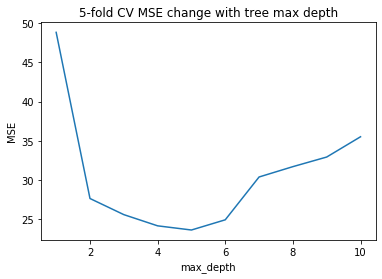

In [73]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)
    
plt.plot(hps['max_depth'], -cvres["mean_test_score"])
plt.title('5-fold CV MSE change with tree max depth')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()

## Retrive the best model

In [45]:
grid_search.best_params_
best_tree_regressor = grid_search.best_estimator_

# Produce the value for 'max_depth'
print("Best hyperparameter is {}.".format(grid_search.best_params_))

# Model prediction on training & test data
y_pred_train = best_tree_regressor.predict(X_train)
y_pred_test = best_tree_regressor.predict(X_test)

print('\n--Train MSE--\n{}'.format(mean_squared_error(y_train, y_pred_train)))

print('\n--Test MSE--\n{}\n'.format(mean_squared_error(y_test, y_pred_test)))

Best hyperparameter is {'max_depth': 5}.

--Train MSE--
11.764408050885109

--Test MSE--
21.79121181171205



## Real test curve V.S. cross-validation curve

Tree depth: 1, Test MSE: 46.91780325106487
Tree depth: 2, Test MSE: 25.993190895971196
Tree depth: 3, Test MSE: 24.35254079481681
Tree depth: 4, Test MSE: 23.17141859821451
Tree depth: 5, Test MSE: 21.79121181171205
Tree depth: 6, Test MSE: 21.851264255814367
Tree depth: 7, Test MSE: 41.88241489847824
Tree depth: 8, Test MSE: 42.348088928921875
Tree depth: 9, Test MSE: 36.57923994323891
Tree depth: 10, Test MSE: 46.11817461092076


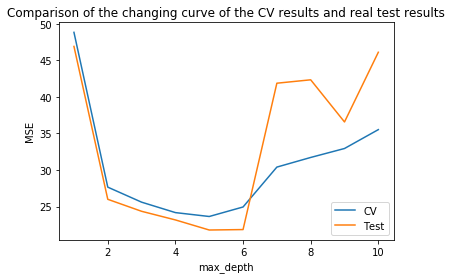

In [77]:
test_results = []
for max_depth in hps['max_depth']:
    tmp_results = []
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)    
    regressor.fit(X_train, y_train)
    test_results.append(mean_squared_error(regressor.predict(X_test) , y_test))
    print('Tree depth: {}, Test MSE: {}'.format(max_depth, test_results[-1])) 
    
plt.plot(hps['max_depth'], -cvres["mean_test_score"])
plt.plot(hps['max_depth'], test_results)
plt.title('Comparison of the changing curve of the CV results and real test results')
plt.legend(['CV', 'Test'])
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()